# Forest Cover Type Prediction

## Bibliothèques

In [30]:
from urllib.request import urlopen
import os.path as osp
import os
import logging
import gzip
from glob import glob
logging.getLogger().setLevel('INFO')

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Télécharement des données

In [2]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')
    output.write(url.read())
    output.close()

In [11]:
BASE_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'
DATA_DIR = 'covtype'

DATA_URL = BASE_URL + DATA_DIR + "/covtype.data.gz"

os.makedirs(osp.join(DATA_DIR, 'archives'), exist_ok=True)

logging.info("downloading & extracting file %s", DATA_URL)
archive_path = osp.join(DATA_DIR, 'archives', osp.basename(DATA_URL))
download_file(DATA_URL, archive_path)

INFO:root:downloading & extracting file https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz


## Visualisation des données

In [3]:
features_names = {'Elevation':[0],'Aspect':[1],'Slope':[2],
                  'Horizontal_Distance_To_Hydrology':[3],
                  'Vertical_Distance_To_Hydrology':[4],
                  'Horizontal_Distance_To_Roadways':[5],
                  'Hillshade_9am':[6],'Hillshade_Noon':[7],
                  'Hillshade_3pm':[8],
                  'Horiontal_Distance_To_Fire_Points':[9],
                  'Wilderness_Area':[10,11,12,13],
                  'Soil_Type':list(range(14,54)),
                  'Cover_Type':[54]}

def convert_to_listofint(df_attribut):
    return [[int(x) for x in X.split()] for X in df_attribut]

def convert_to_int(df_attribut):
    return [int(x) for x in df_attribut]

In [4]:
df_covtype = pd.read_csv('covtype/archives/covtype.data.gz',
                         header=None,
                         parse_dates=features_names,
                         compression='gzip')

for attribut in features_names:
    if attribut in ['Wilderness_Area','Soil_Type']:
        df_covtype[attribut] = convert_to_listofint(df_covtype[attribut])
    else:
        df_covtype[attribut] = convert_to_int(df_covtype[attribut])

In [5]:
df_covtype.groupby('Cover_Type').mean()

,Aspect,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Hydrology,Hillshade_Noon,Hillshade_9am,Horiontal_Distance_To_Fire_Points,Hillshade_3pm,Slope,Elevation
Cover_Type,,,,,,,,,,
1,156.138227,42.156939,2614.834517,270.555245,223.430211,211.998782,2009.253517,143.875038,13.127110,3128.644888
2,152.060515,45.884219,2429.530799,279.916442,225.326596,213.844423,2168.154849,142.983466,13.550499,2920.936061
3,176.372490,62.446915,943.940734,210.276473,215.826537,201.918415,910.955949,140.367176,20.770208,2394.509845
4,137.139425,41.186749,914.199490,106.934838,216.997088,228.345832,859.124135,111.392792,18.528941,2223.939934
5,139.283051,50.610344,1349.765722,212.354893,219.035816,223.474876,1577.719794,121.920889,16.641315,2787.417571
6,180.539068,45.437439,1037.169805,159.853458,209.827662,192.844302,1055.351471,148.284044,19.048886,2419.181897
7,153.236226,69.474305,2738.250463,356.994686,221.746026,216.967723,2070.031594,134.932033,14.255924,3361.928669


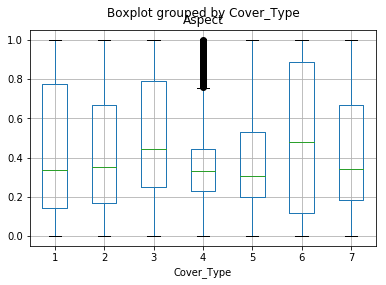

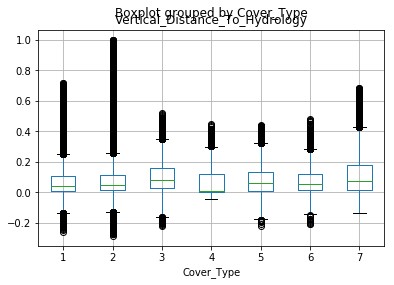

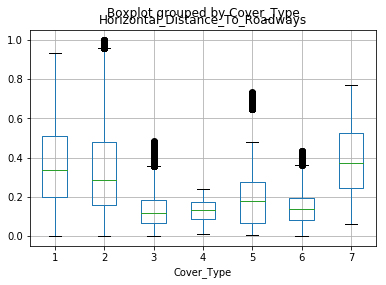

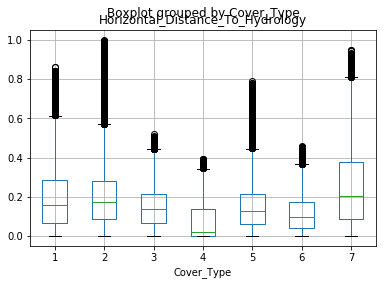

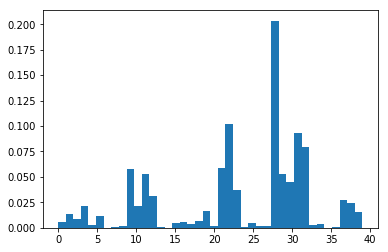

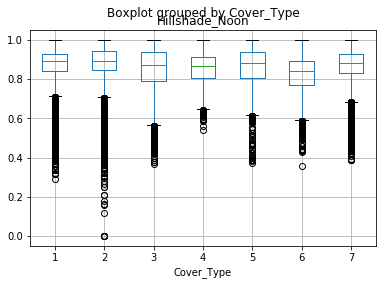

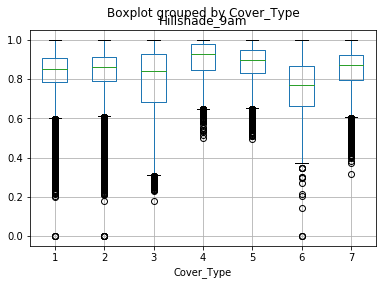

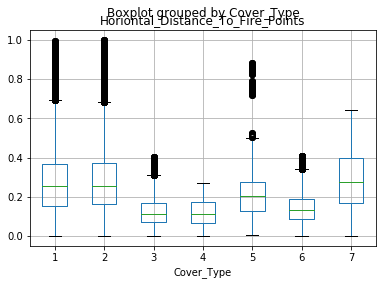

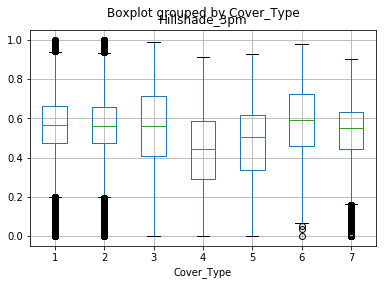

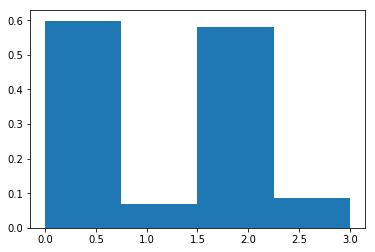

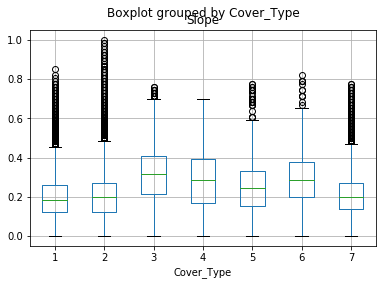

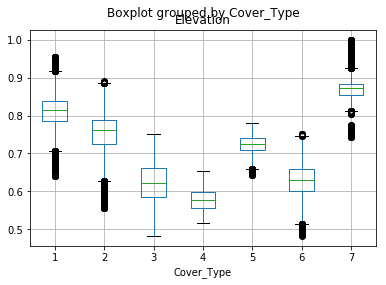

In [60]:
for attribut in features_names:
    if attribut in ['Wilderness_Area','Soil_Type']:
        histogram = [x.index(1) for x in df_covtype[attribut]]
        plt.hist(histogram,density=True,
                 bins=len(df_covtype[attribut][0]))
        plt.show()
    elif not(attribut is 'Cover_Type'):
        df_covtype[attribut] /= max(df_covtype[attribut]) #Normalisation
        df_covtype.boxplot(column=attribut,by='Cover_Type')
        plt.show()

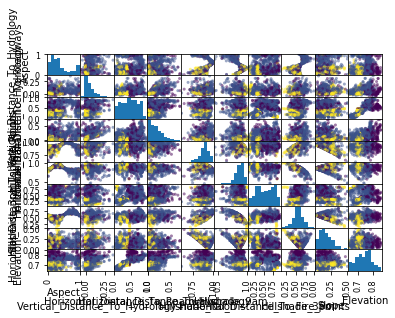

In [53]:
scatter_matrix(df_covtype.drop(['Wilderness_Area','Soil_Type','Cover_Type'],axis=1)[:700],
               c=df_covtype.Cover_Type.values[:700])
plt.show()

In [55]:
data = df_covtype.drop('Cover_Type',axis=1).values
target = df_covtype.Cover_Type.values

# Break data into train / test sets
(x_train,x_test,y_train,y_test) = train_test_split(data,target,
                                                  random_state=0,
                                                  test_size=.2)

# Further break training data into train / validation sets 
(x_train, x_valid) = x_train[40000:], x_train[:40000] 
(y_train, y_valid) = y_train[40000:], y_train[:40000]

# Print training set shape
print("x_train shape:", x_train.shape, 
      "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (424809, 12) y_train shape: (424809,)
424809 train set
40000 validation set
116203 test set


In [57]:
data[0]

array([0.14166666666666666, 0.0, 0.0716594070535338, 0.18468146027201146,
       list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
       0.9133858267716536, 0.8700787401574803, 0.8753659556670849,
       0.5826771653543307, list([1, 0, 0, 0]), 0.045454545454545456,
       0.6728875064800415], dtype=object)